In [1]:
#Import libraries

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from PIL import Image
import datetime
import math
plotly.offline.init_notebook_mode(connected=True)


# Read Excel Sheet for dataframes
df1 = pd.read_excel(io="C:/Users/Gautam/Desktop/marvel-dataset-final.xlsx", sheet_name="marvel")
df2 = pd.read_excel(io="C:/Users/Gautam/Desktop/marvel-dataset-final.xlsx", sheet_name="movieCast")
df3 = pd.read_excel(io="C:/Users/Gautam/Desktop/marvel-dataset-final.xlsx", sheet_name="actor")


# Interactive Line Chart with Dropdown options

In [9]:
def to_unix_time(dt):
    epoch =  datetime.datetime.utcfromtimestamp(0)
    return (dt - epoch).total_seconds() * 1000


movie = df1['TITLE']
images = df1['IMAGES']
prodBudget = go.Scatter(
            x=df1['RELEASE DATE'],
            y=df1['PRODUCTION BUDGET'],
            name = "Production Budget",
            line = dict(color = '#7F7F7F'),
            opacity = 0.8,
            mode='lines+markers', 
            hovertext=movie,
            hoverlabel=dict(bgcolor='#7F7F7F'),
            marker=dict(symbol = "star",size =10)
        )

worldBox = go.Scatter(
            x=df1['RELEASE DATE'],
            y=df1['WORLDWIDE BOX OFFICE'],
            name = "Worldwide Box Office Collection",
            line = dict(color = '#17BECF'),
            opacity = 0.8,
            mode='lines+markers', 
            hovertext=movie,
            hoverlabel=dict(bgcolor='#17BECF'),
            marker=dict(symbol = "star", size = 10 ),
            
)
openWeek = go.Scatter(
            x=df1['RELEASE DATE'],
            y=df1['OPENING WEEKEND'],
            name = "Opening Weekend Collection",
            line = dict(color = '#F4D03F'),
            opacity = 0.8,
            mode='lines+markers', 
            hovertext=movie,
            hoverlabel=dict(bgcolor='#F4D03F'),
            marker=dict(symbol = "star", size = 10 ),
            
)
domesticBox = go.Scatter(
            x=df1['RELEASE DATE'],
            y=df1['DOMESTIC BOX OFFICE'],
            name = "Domestic Box Office Collection",
            line = dict(color = '#E74C3C'),
            opacity = 0.8,
            mode='lines+markers', 
            hovertext=movie,
            hoverlabel=dict(bgcolor='#E74C3C'),
            marker=dict(symbol = "star", size = 10 ),
            
)

data = [prodBudget,worldBox,domesticBox,openWeek]

updatemenus = list([
    dict(active=3,
         buttons=list([   
            dict(label = 'World Box Office Collection',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         ]),
            dict(label = 'Domestic Box Office Collection',
                 method = 'update',
                 args = [{'visible': [True, False, True, False]},
                         ]),
            dict(label = 'Opening Weekend Collection',
                 method = 'update',
                 args = [{'visible': [True, False, False, True]},
                         ]),
            dict(label = 'Reset',
                 method = 'update',
                 args = [{'visible': [True, True, True, True]},
                         ])
        ]),
    )
])

layout = go.Layout(    
                   title="Marvel Movie Collection in USD" ,yaxis =dict(title = 'Amount in USD',ticks = "inside" ),
                   xaxis =dict(range = [to_unix_time(datetime.datetime(2007, 1, 1)),
                                        to_unix_time(datetime.datetime(2021, 1, 1))],
                                        title= 'Date Released',ticks = "inside"),updatemenus=updatemenus
                  )


fig = go.Figure(data = data, layout = layout)

plotly.offline.iplot(fig,filename="Marvel Movie Collection In USD")

# Logarithmic Bubble Scatter Plot

In [3]:
df = pd.read_excel(io="C:/Users/Gautam/Desktop/marvel-dataset-final.xlsx", sheet_name="marvel")
df2 = pd.read_excel(io="C:/Users/Gautam/Desktop/marvel-dataset-final.xlsx", sheet_name="movieCast")
df3 = pd.read_excel(io="C:/Users/Gautam/Desktop/marvel-dataset-final.xlsx", sheet_name="actor")

slope = 5
hover_text = []
bubble_size = []
color= []



for index, row in df3.iterrows():
    hover_text.append(('Name: {person} <br>'+'Character: {character} <br>'+'No. Of Appearances: {appearances} <br>'+'Franchise/Career : {ratio} %')
                      .format(person=row['Person'],
                              character=row['Role'],
                              appearances=row['Nr. Of Movies'],
                              ratio=row['Franchise/Career']*100))
    bubble_size.append((row['Nr. Of Movies']*slope))

df3['text'] = hover_text
df3['size'] = bubble_size
custom_color = {
    "trace0":"#E65100",
    "trace1":"#FF8F00",
    "trace2":"#FBC02D",
    "trace3":"#C0CA33",
    "trace4":"#8BC34A",
    "trace5":"#66BB6A",
    "trace6":"#4DB6AC",
    "trace7":"#80DEEA",
    "trace8":"#B3E5FC",
    "trace9":"#E3F2FD"
}

sizeref = 2*max(df3['size'])/(100**2)

trace0 = go.Scatter(
    x=df3['Career Worldwide Box Office'][(df3['Franchise/Career']*100).between (90,100)],
    y=df3['Franchise Worldwide Box Office'][(df3['Franchise/Career']*100).between (90,100)],
    mode='markers',
    name='Franchise/Career Above 90%',
    text=df3['text'][(df3['Franchise/Career']*100).between (90,100)],
    marker=dict(
        sizemode='area',
       sizeref=sizeref,
        color = custom_color["trace0"],
        size=df3['size'][(df3['Franchise/Career']*100).between (90,100)],
        line=dict(
            width=2
        ),
    ),
   

)

trace1 = go.Scatter(
    x=df3['Career Worldwide Box Office'][(df3['Franchise/Career']*100).between (80,90)],
    y=df3['Franchise Worldwide Box Office'][(df3['Franchise/Career']*100).between (80,90)],
    mode='markers',
    name='Franchise/Career Above 80%',
    text=df3['text'][(df3['Franchise/Career']*100).between (80,90)],
    marker=dict(
        sizemode='area',
       sizeref=sizeref,
        color = custom_color["trace1"],
        size=df3['size'][(df3['Franchise/Career']*100).between (80,90)],
        line=dict(
            width=2
        ),
    ),

)

trace2 = go.Scatter(
    x=df3['Career Worldwide Box Office'][(df3['Franchise/Career']*100).between (70,80)],
    y=df3['Franchise Worldwide Box Office'][(df3['Franchise/Career']*100).between (70,80)],
    mode='markers',
    name='Franchise/Career Above 70%',
    text=df3['text'][(df3['Franchise/Career']*100).between (70,80)],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        color = custom_color["trace2"],
        size=df3['size'][(df3['Franchise/Career']*100).between (70,80)],
        line=dict(
            width=2
        ),
    ),

)

trace3 = go.Scatter(
    x=df3['Career Worldwide Box Office'][(df3['Franchise/Career']*100).between (60,70)],
    y=df3['Franchise Worldwide Box Office'][(df3['Franchise/Career']*100).between (60,70)],
    mode='markers',
    name='Franchise/Career Above 60%',
    text=df3['text'][(df3['Franchise/Career']*100).between (60,70)],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        color = custom_color["trace3"],
        size=df3['size'][(df3['Franchise/Career']*100).between (60,70)],
        line=dict(
            width=2
        ),
    ),

)

trace4 = go.Scatter(
    x=df3['Career Worldwide Box Office'][(df3['Franchise/Career']*100).between (50,60)],
    y=df3['Franchise Worldwide Box Office'][(df3['Franchise/Career']*100).between (50,60)],
    mode='markers',
    name='Franchise/Career Above 50%',
    text=df3['text'][(df3['Franchise/Career']*100).between (50,60)],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        color = custom_color["trace4"],
        size=df3['size'][(df3['Franchise/Career']*100).between (50,60)],
        line=dict(
            width=2
        ),
    ),

)

trace5 = go.Scatter(
    x=df3['Career Worldwide Box Office'][(df3['Franchise/Career']*100).between (40,50)],
    y=df3['Franchise Worldwide Box Office'][(df3['Franchise/Career']*100).between (40,50)],
    mode='markers',
    name='Franchise/Career Above 40%',
    text=df3['text'][(df3['Franchise/Career']*100).between (40,50)],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        color = custom_color["trace5"],
        size=df3['size'][(df3['Franchise/Career']*100).between (40,50)],
        line=dict(
            width=2
        ),
    ),

)

trace6 = go.Scatter(
    x=df3['Career Worldwide Box Office'][(df3['Franchise/Career']*100).between (30,40)],
    y=df3['Franchise Worldwide Box Office'][(df3['Franchise/Career']*100).between (30,40)],
    mode='markers',
    name='Franchise/Career Above 30%',
    text=df3['text'][(df3['Franchise/Career']*100).between (30,40)],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        color = custom_color["trace6"],
        size=df3['size'][(df3['Franchise/Career']*100).between (30,40)],
        line=dict(
            width=2
        ),
    ),

)

trace7 = go.Scatter(
    x=df3['Career Worldwide Box Office'][(df3['Franchise/Career']*100).between (20,30)],
    y=df3['Franchise Worldwide Box Office'][(df3['Franchise/Career']*100).between (20,30)],
    mode='markers',
    name='Franchise/Career Above 20%',
    text=df3['text'][(df3['Franchise/Career']*100).between (20,30)],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        color = custom_color["trace7"],
        size=df3['size'][(df3['Franchise/Career']*100).between (20,30)],
        line=dict(
            width=2
        ),
    ),

)

trace8 = go.Scatter(
    x=df3['Career Worldwide Box Office'][(df3['Franchise/Career']*100).between (10,20)],
    y=df3['Franchise Worldwide Box Office'][(df3['Franchise/Career']*100).between (10,20)],
    mode='markers',
    name='Franchise/Career Above 10%',
    text=df3['text'][(df3['Franchise/Career']*100).between (10,20)],
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        color = custom_color["trace8"],
        size=df3['size'][(df3['Franchise/Career']*100).between (10,20)],
        line=dict(
            width=2
        ),
    ),

)

trace9 = go.Scatter(
    x=df3['Career Worldwide Box Office'][(df3['Franchise/Career']*100).between (0,10)],
    y=df3['Franchise Worldwide Box Office'][(df3['Franchise/Career']*100).between (0,10)],
    mode='markers',
    name='Franchise/Career Less Than 10%',
    text=df3['text'][(df3['Franchise/Career']*100).between (0,10)],
  
    marker=dict(
        sizemode='area',
        sizeref=sizeref,
        color = custom_color["trace9"],
        size=df3['size'][(df3['Franchise/Career']*100).between (0,10)],
        line=dict(width=2),
        ),
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]

layout = go.Layout(
    title='Celebrity Appearances with Franchise Collection over Career Collection',
    xaxis=dict(
        title='Career Worldwide Box Office',
        gridcolor='#FDFEFE',
       type='log',
       zerolinewidth=1,
        ticklen=5,
        gridwidth=1,
    ),
    yaxis=dict(
        title='Franchise Worldwide Box Office',
        gridcolor='#FDFEFE',
       zerolinewidth=1,
        ticklen=5,
        gridwidth=1,
    ),
    paper_bgcolor='#FDFEFE',
    plot_bgcolor='rgb(243, 243, 243)',
    legend = dict(bordercolor = 'rgb(0, 0, 0)',tracegroupgap = 10)
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='Celebrity Appearances')
#py.icreate_animations(figure, 'points_changing_size'+str(time.time()))

# Bar chart with Line Plot

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=df1['TITLE'],
    y=df1['WORLDWIDE BOX OFFICE']-df1['PRODUCTION BUDGET'],
    name='Profit in USD',
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
)

trace2 = go.Scatter(
    y=df1['IMDB RATING'],
    x=df1['TITLE'],
     name='IMDB Rating',
    yaxis='y2',
    line=dict(
        color='rgb(128, 0, 128)'),
)
data = [trace1,trace2]
layout = go.Layout(
    barmode='group',
    title="IMDB Ratings & Marvel Profit",
    xaxis =dict(ticks = "inside",tickangle = (35) ),
     yaxis=dict(
        title='Profit in USD',
         titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        )
    ),
    yaxis2=dict(
        title='IMDB Rating',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='IMDB Ratings & Marvel Profit')

# Experimenting with Images

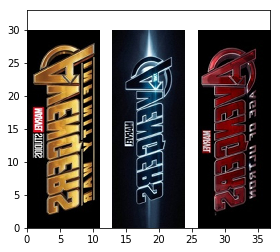

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import imageio

def image_plot(heights, images, spacing=0):
    # Iterate through images and data, autoscaling the width to
    # the aspect ratio of the image
    for i, (height, img) in enumerate(zip(heights, images)):
        AR = img.shape[1] / img.shape[0]
        width = height * AR
        left = width*i + spacing*i
        right = left + width
        plt.imshow(img, extent=[left, right, 0, height])
    # Set x,y limits on plot window
    plt.xlim(0, right)
    plt.ylim(0, max(heights)*1.1)

# Read in flag images
usa_flag = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Avengers-Infinity-War.jpg").swapaxes(0, 1)
aussie_flag = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Avengers.jpg").swapaxes(0, 1)
turkish_flag = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Avengers-Age-of-Ultron.jpg").swapaxes(0, 1)

# Make up some data about each country
usa_data = 30
aussie_data = 30
turkish_data = 30

data = [usa_data, aussie_data, turkish_data]
flags = [usa_flag, aussie_flag, turkish_flag]

image_plot(data, flags, spacing=2)

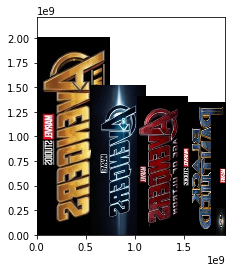

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import imageio
import pandas as pd

def image_plot(heights, images, spacing):

    for i, (height, img) in enumerate(zip(heights, images)):
        AR = img.shape[1] / img.shape[0]
        width = height * AR
        left = width*i + spacing*i
        right = left + width
        plt.xlim(0, right)
        plt.ylim(0, max(heights)*1.1)
        plt.imshow(img, extent=[left, right, 0, height])
    # Set x,y limits on plot window
   

# Read in images
ant_Man = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Ant-Man.jpg").swapaxes(0, 1)
ant_Man2 = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Ant-Man-and-the-Wasp.jpg").swapaxes(0, 1)
avengers= imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Avengers.jpg").swapaxes(0, 1)
avengers_ultron = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Avengers-Age-of-Ultron.jpg").swapaxes(0, 1)
avengers_endgame = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Avengers-End-Game.jpg").swapaxes(0, 1)
avengers_infinitywars = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Avengers-Infinity-War.jpg").swapaxes(0, 1)
black_panther= imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Black-Panther.jpg").swapaxes(0, 1)
captainamerica= imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Captain-America.jpg").swapaxes(0, 1) 
captainamerica_civilwar= imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Captain-America-Civil-War.jpg").swapaxes(0, 1) 
captainamerica_wintersoldier=imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Captain-America-The-Winter-Soldier.jpg").swapaxes(0, 1) 
captainmarvel=imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Captain-Marvel.jpg").swapaxes(0, 1)   
drstrange=imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Doctor-Strange.jpg").swapaxes(0, 1)
gog= imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Guardians-of-the-Galaxy.jpg").swapaxes(0, 1)
gog2= imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Guardians-of-the-Galaxy-Vol-2.jpg").swapaxes(0, 1)                    
gog3= imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Guardians-of-the-Galaxy-Vol-3.jpg").swapaxes(0, 1)
ironman= imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Iron-Man.jpg").swapaxes(0, 1)  
ironman2= imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Iron-Man-2.jpg").swapaxes(0, 1) 
ironman3= imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Iron-Man-3.jpg").swapaxes(0, 1)
spiderman1=  imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Spider-Man-Homecoming.jpg").swapaxes(0, 1)
spiderman2=  imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Spider-Man-Far-From-Home.jpg").swapaxes(0, 1)
hulk=  imageio.imread("C:/Users/Gautam/Desktop/marvel-images/The-Incredible-Hulk.jpg").swapaxes(0, 1)
thor = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Thor.jpg").swapaxes(0, 1)
thor2 = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Thor-The-Dark-World.jpg").swapaxes(0, 1)
thor3 = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Thor-Ragnarok.jpg").swapaxes(0, 1)                      
                            
                            
                            
#usa_flag = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Avengers-Infinity-War.jpg")
#aussie_flag = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/The-Avengers.jpg").swapaxes(0, 1)
#turkish_flag = imageio.imread("C:/Users/Gautam/Desktop/marvel-images/Avengers-Age-of-Ultron.jpg").swapaxes(0, 1)


data = df1["WORLDWIDE BOX OFFICE"].sort_values(ascending=False)
images = [avengers_infinitywars,avengers,avengers_ultron,black_panther,ironman3,captainamerica_civilwar,spiderman1,
          gog2,thor3,gog,captainamerica_wintersoldier,drstrange,thor2,ironman2,ant_Man2, ironman,ant_Man,thor,captainamerica,
          hulk]
#captainmarvel]
#avengers_endgame,spiderman2,gog3]
index = np.arange(len(images))

image_plot(data, images, spacing=10)

#def plot_bar_x():
    # this is for plotting purpose
 
#plt.barh(images, data)
#plt.xlabel('Movies', fontsize=5)
#plt.ylabel('Worldwide Collection', fontsize=5)
#plt.xticks(index, data, fontsize=5, rotation=30)
#plt.title('Marvel')
#plt.show()